In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print('Training data: {}, {}'.format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [5]:
print('Test data: {}, {}'.format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [6]:
class_labels = np.unique(train_labels)

print('There are {} classes in dataset. They are: {}'.format(len(class_labels), class_labels))

There are 10 classes in dataset. They are: [0 1 2 3 4 5 6 7 8 9]


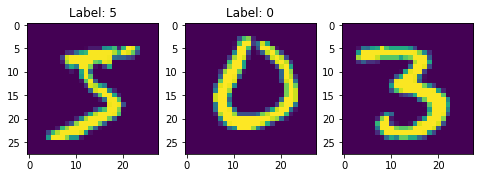

In [7]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title('Label: {}'.format(train_labels[0]))

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title('Label: {}'.format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(train_images[12])

plt.show()

In [8]:
# Before scaling
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [10]:
# After scaling
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Split training data to training and validation sets.
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [12]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:]) #np.prod() returns the product of array elements over a given axis.

x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)

test_images = test_images.reshape(test_images.shape[0], new_dimension)

print('X_train: {}'.format(x_train.shape))
print('X_val: {}'.format(x_val.shape))
print('test_images: {}'.format(test_images.shape))

X_train: (50000, 784)
X_val: (10000, 784)
test_images: (10000, 784)


In [13]:
# Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [14]:
# placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# inputs 
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons= 256, second_layer_neurons= 128):
   
    # first layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    
    # Second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    
    # Output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    
    return logits

In [16]:
logits = multilayer_perceptron(X, no_labels)
learn_rate = 0.01
# Define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits,
                                                                labels= Y))
optimiser = tf.train.AdamOptimizer(learning_rate= learn_rate)
train_op = optimiser.minimize(loss_op)

# Initialise the variables 
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
# Trian model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    
  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.8392000198364258


# Optimisation for Training Deep Neural Networks

In [18]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [23]:
# Building a Sequential Feed Forward Network in keras
model = Sequential()
model.add(Dense(256, activation= 'relu', input_shape=(new_dimension, )))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(no_labels, activation= 'softmax'))

model.compile(optimizer='adam', loss= tf.keras.losses.categorical_crossentropy,
             metrics= ['accuracy'])
history = model.fit(x_train, y_train, validation_data= (x_val, y_val), epochs= 20, batch_size= 1000)

test_loss = test_accuracy = model.evaluate(test_images, y_test)

print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.6834 - acc: 0.8174

C:\Users\JK\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 2s 34us/sample - loss: 0.6760 - acc: 0.8191 - val_loss: 0.2600 - val_acc: 0.9260
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2365 - acc: 0.9331 - val_loss: 0.1915 - val_acc: 0.9474
Epoch 3/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1766 - acc: 0.9491 - val_loss: 0.1512 - val_acc: 0.9580
Epoch 4/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1385 - acc: 0.9611 - val_loss: 0.1348 - val_acc: 0.9617
Epoch 5/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1130 - acc: 0.9683 - val_loss: 0.1186 - val_acc: 0.9657
Epoch 6/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.0938 - acc: 0.9730 - val_loss: 0.1066 - val_acc: 0.9686
Epoch 7/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.0799 - acc: 0.9774 - val_loss: 0.1003 - val_acc: 0.9704
Epoch 8/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curve - before regularisation')

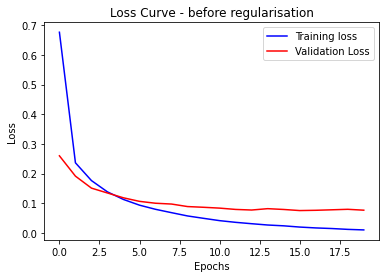

In [24]:
# Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve - before regularisation')

#### Although the validation and training loss seem great, we can see that the validation loss increases. This identifies overfitting in our network. How do we proceed? ->**Introduce regularisation to the model.**

In [25]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()

reg_model.add(Dense(256, activation= 'relu', input_shape= (new_dimension, )))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation= 'relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation= 'softmax'))

reg_model.compile(optimizer= 'adam', loss= tf.keras.losses.categorical_crossentropy,
                  metrics= ['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data= (x_val, y_val), 
                            epochs= 20, batch_size= 1000)

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)

print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.9587 - acc: 0.6949

C:\Users\JK\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


50000/50000 [==============================] - 3s 56us/sample - loss: 0.9488 - acc: 0.6983 - val_loss: 0.2917 - val_acc: 0.9183
Epoch 2/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.3788 - acc: 0.8878 - val_loss: 0.2049 - val_acc: 0.9422
Epoch 3/20
50000/50000 [==============================] - 2s 47us/sample - loss: 0.2837 - acc: 0.9174 - val_loss: 0.1629 - val_acc: 0.9541
Epoch 4/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.2317 - acc: 0.9325 - val_loss: 0.1392 - val_acc: 0.9612
Epoch 5/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1998 - acc: 0.9417 - val_loss: 0.1273 - val_acc: 0.9629
Epoch 6/20
50000/50000 [==============================] - 3s 51us/sample - loss: 0.1749 - acc: 0.9488 - val_loss: 0.1127 - val_acc: 0.9665
Epoch 7/20
50000/50000 [==============================] - 3s 63us/sample - loss: 0.1603 - acc: 0.9529 - val_loss: 0.1043 - val_acc: 0.9695
Epoch 8/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curve - before regularisation')

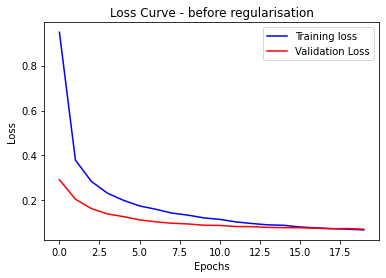

In [28]:
# Check for Overfitting

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve - before regularisation')

# NICEEEEEEEEE :)